In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('DONE')

DONE


In [2]:
#IMPORTING THE DATASET
corona_dataset_csv = pd.read_csv('Datasets/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#Dropping unused columns
df = corona_dataset_csv.drop(['Lat','Long'], axis = 1, inplace = True)


In [4]:
#grouping the rows by country

corona_dataset_group = corona_dataset_csv.groupby('Country/Region').sum()

In [5]:
corona_dataset_group.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
#checking the shape of the new df

corona_dataset_group.shape

(187, 100)

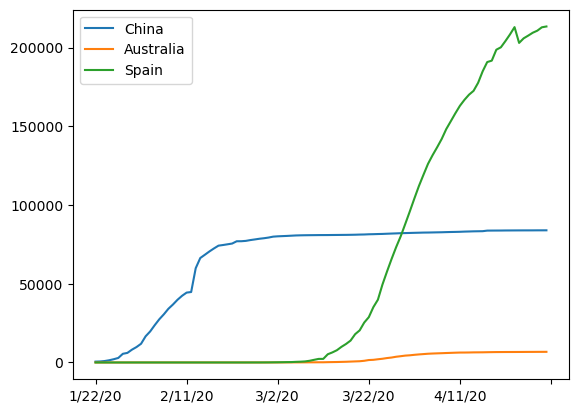

In [7]:
#visualizing the data

corona_dataset_group.loc['China'].plot()
corona_dataset_group.loc['Australia'].plot()
corona_dataset_group.loc['Spain'].plot()

plt.legend()

Max infection rate =  15136.0


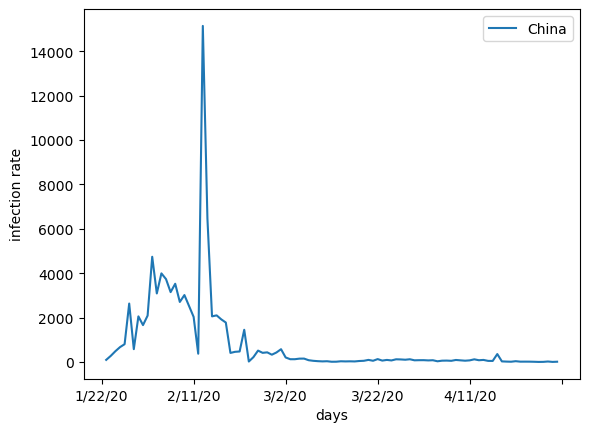

In [8]:
#finding the rate of the infection 
#we need a derivative of the graph

corona_dataset_group.loc['China'].diff().plot()
plt.legend()
plt.xlabel('days')
plt.ylabel('infection rate')
print('Max infection rate = ',corona_dataset_group.loc['China'].diff().max())

In [9]:
#finding the max infection rate for all the countries
#we are using data frames and did not import as a dict so we need to cast the aggregated data frame
countries = list(corona_dataset_group.index)
#this give the list of all country names
max_infection_rates = [] #empty list to store in

for c in countries:
    max_infection_rates.append(corona_dataset_group.loc[c].diff().max())
corona_dataset_group['max_infection_rate'] = max_infection_rates #create new column    
#we only need the max infection rates column for now, so create a new df

corona_data = pd.DataFrame(corona_dataset_group['max_infection_rate'])

corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [10]:
#import happiness report csv
happiness_report_csv = pd.read_csv('Datasets/worldwide_happiness_report.csv')

In [11]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
happiness_report_csv.shape

(156, 9)

In [13]:
#change the index or primary key
happiness_report_csv.set_index('Country or region', inplace = True)

In [14]:
happiness_report_csv.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
#drop unused columns
happiness_report_csv.drop(['Generosity','Perceptions of corruption','Score','Overall rank'], axis =1, inplace =True)

In [16]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [17]:
#inner join to merge since happiness report is smaller than corona_data
#see shapes below

print('Corona shape: ',corona_data.shape)
print('Happiness shape: ', happiness_report_csv.shape)

Corona shape:  (187, 1)
Happiness shape:  (156, 4)


In [18]:
data = corona_data.join(happiness_report_csv, how ='inner')
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [19]:
#lets check for correlation between the columns 
#result gives a correlation matrix that shows positive correlation
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [20]:
#lets visualize with seaborn
#Plot all columns vs max_infection_rate

C:\Users\Paa.Boafo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

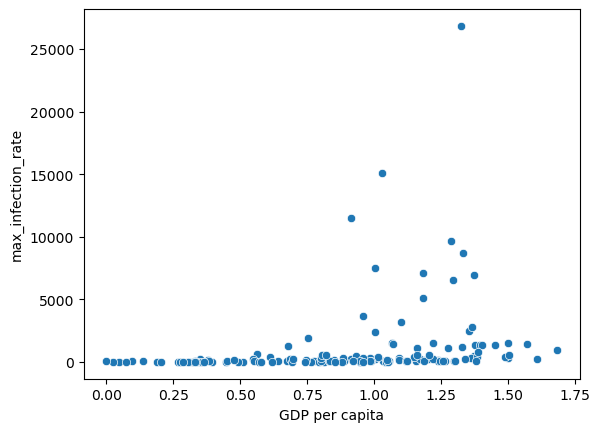

In [22]:
#Plot of GDP vs Maximun infection rate
x= data['GDP per capita']
y= data['max_infection_rate']
sns.scatterplot(x,y)

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

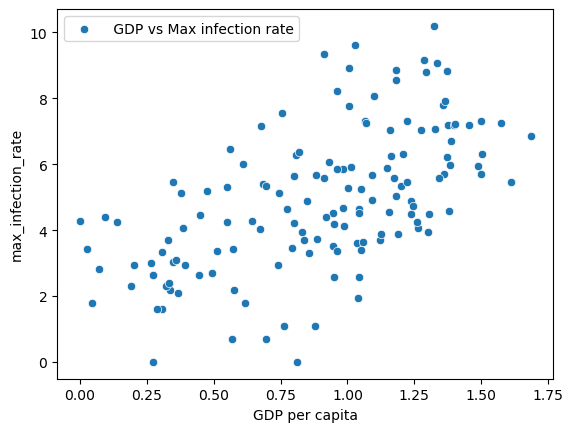

In [37]:
#plot is not good enough to show the correlation
#change the scale using log using the numpy module
x= data['GDP per capita']
y= data['max_infection_rate']
sns.scatterplot(x,np.log(y),  label = ' GDP vs Max infection rate')

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

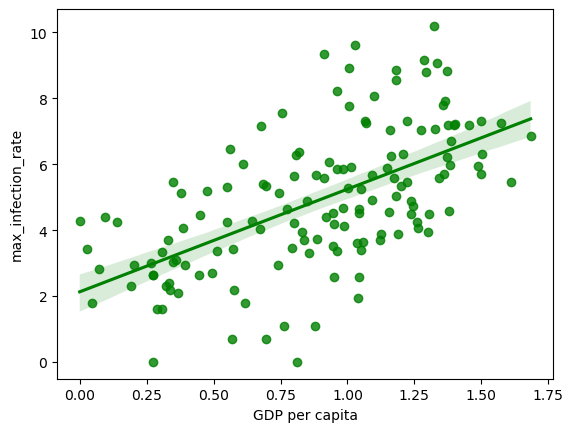

In [33]:
#we can show a trend line using regplot()
sns.regplot(x,np.log(y),color ='green')

<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

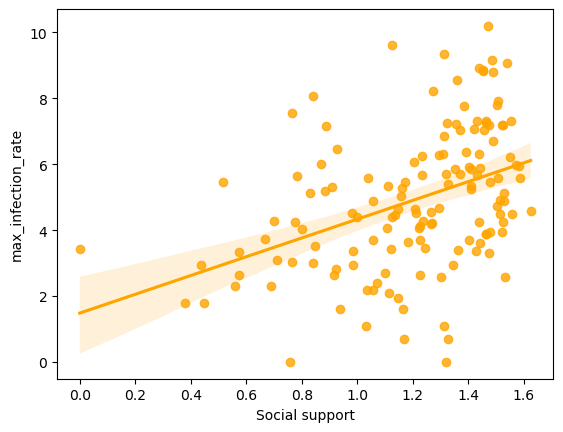

In [40]:
x=data['Social support']
y=data['max_infection_rate']
sns.regplot(x,np.log(y),color ='orange')

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

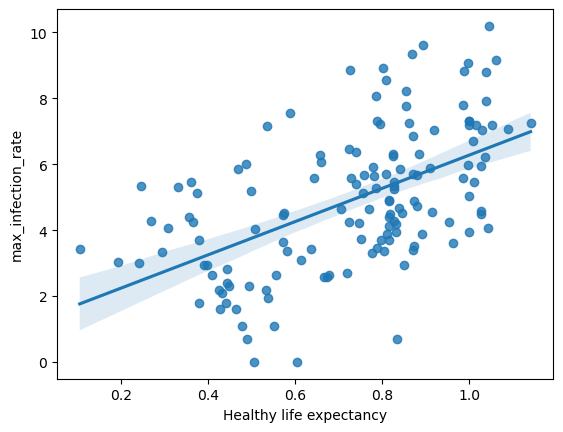

In [34]:
x=data['Healthy life expectancy']
y=data['max_infection_rate']
sns.regplot(x,np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

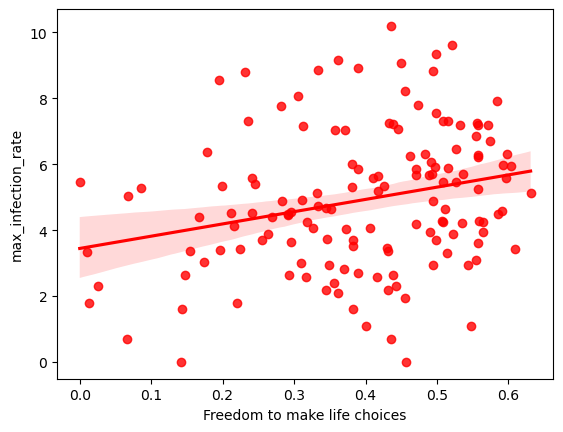

In [36]:
x=data['Freedom to make life choices']
y=data['max_infection_rate']
sns.regplot(x,np.log(y), color = 'red')